In [1]:
# notebook for demoing results of the trained model
import torch.nn as tnn

class ConvNeuralNet(tnn.Module):
    #  Determine what layers and their order in CNN object
    # Code from https://blog.paperspace.com/writing-cnns-from-scratch-in-pytorch/
    def __init__(self, num_classes, dropout_rate):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = tnn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding='same')
        self.drop1 = tnn.Dropout(dropout_rate)
        self.conv_layer2 = tnn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, padding='same')
        self.batch_norm1 = tnn.BatchNorm2d(16)
        self.max_pool1 = tnn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = tnn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding='same')
        self.drop2 = tnn.Dropout(dropout_rate)
        self.conv_layer4 = tnn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding='same')
        self.batch_norm2 = tnn.BatchNorm2d(32)
        self.max_pool2 = tnn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer5 = tnn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same')
        self.drop3 = tnn.Dropout(dropout_rate)
        self.conv_layer6 = tnn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding='same')
        self.batch_norm3 = tnn.BatchNorm2d(64)
        self.max_pool3 = tnn.MaxPool2d(kernel_size = 2, stride = 2)        

        self.conv_layer7 = tnn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same')
        self.drop4 = tnn.Dropout(dropout_rate)
        self.conv_layer8 = tnn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding='same')
        self.batch_norm4 = tnn.BatchNorm2d(128)
        self.max_pool4 = tnn.MaxPool2d(kernel_size = 2, stride = 2)    
        
        self.fc1 = tnn.Linear(28160, 128)
        self.relu1 = tnn.ReLU()
        self.dropend = tnn.Dropout(p=0.5) # accordding to literature, in FC layers dropout=0.5 is best
        self.fc2 = tnn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.drop1(out)
        out = self.conv_layer2(out)
        out = self.batch_norm1(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.drop2(out)
        out = self.conv_layer4(out)
        out = self.batch_norm2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer5(out)
        out = self.drop3(out)
        out = self.conv_layer6(out)
        out = self.batch_norm3(out)
        out = self.max_pool3(out)

        out = self.conv_layer7(out)
        out = self.drop4(out)
        out = self.conv_layer8(out)
        out = self.batch_norm4(out)
        out = self.max_pool4(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.dropend(out)
        out = self.fc2(out)
        return out

    # Get model results for inputs
    def step(self, inputs):
        data, labels = inputs
        outputs = self(data)
        _, preds = torch.max(outputs.data , 1)
        return preds, labels
    
    # get predictions for entire dataloader
    def predict(self, dataloader):
        predictions = torch.Tensor()
        labels = torch.Tensor()
        self.eval() # put in eval mode
        for i, batch in enumerate(dataloader):
            pred, label = self.step(batch)
            predictions = torch.cat((predictions, pred.cpu()))
            labels = torch.cat((labels, label.cpu()))
        return predictions, labels
    

In [2]:
# id conversion helpers
BIOMES = {
    37: 'badlands',
    39: 'badlands_plateau',
    16: 'beach',
    27: 'birch_forest',
    28: 'birch_forest_hills',
    46: 'cold_ocean',
    29: 'dark_forest',
    157: 'dark_forest_hills',
    49: 'deep_cold_ocean',
    50: 'deep_frozen_ocean',
    48: 'deep_lukewarm_ocean',
    24: 'deep_ocean',
    47: 'deep_warm_ocean',
    2: 'desert',
    17: 'desert_hills',
    130: 'desert_lakes',
    43: 'end_barrens',
    42: 'end_highlands',
    41: 'end_midlands',
    165: 'eroded_badlands',
    132: 'flower_forest',
    4: 'forest',
    10: 'frozen_ocean',
    11: 'frozen_river',
    160: 'giant_spruce_taiga',
    161: 'giant_spruce_taiga_hills',
    32: 'giant_tree_taiga',
    33: 'giant_tree_taiga_hills',
    131: 'gravelly_mountains',
    140: 'ice_spikes',
    21: 'jungle',
    23: 'jungle_edge',
    22: 'jungle_hills',
    45: 'lukewarm_ocean',
    167: 'modified_badlands_plateau',
    162: 'modified_gravelly_mountains',
    149: 'modified_jungle',
    151: 'modified_jungle_edge',
    166: 'modified_wooded_badlands_plateau',
    3: 'mountains',
    20: 'mountain_edge',
    14: 'mushroom_fields',
    15: 'mushroom_field_shore',
    8: 'nether',
    0: 'ocean',
    1: 'plains',
    7: 'river',
    35: 'savanna',
    36: 'savanna_plateau',
    163: 'shattered_savanna',
    164: 'shattered_savanna_plateau',
    40: 'small_end_islands',
    26: 'snowy_beach',
    13: 'snowy_mountains',
    30: 'snowy_taiga',
    31: 'snowy_taiga_hills',
    158: 'snowy_taiga_mountains',
    12: 'snowy_tundra',
    25: 'stone_shore',
    129: 'sunflower_plains',
    6: 'swamp',
    134: 'swamp_hills',
    5: 'taiga',
    19: 'taiga_hills',
    133: 'taiga_mountains',
    155: 'tall_birch_forest',
    156: 'tall_birch_hills',
    9: 'the_end',
    127: 'the_void',
    44: 'warm_ocean',
    38: 'wooded_badlands_plateau',
    18: 'wooded_hills',
    34: 'wooded_mountains',
}

def names_from_ids(ids):
    """
    Takes the int array ids and returns a new array of the same size
    containing the biomes names as a strings
    """
    names = []
    for num in ids:
        names.append(BIOMES[num])

    return names

# from FocalLossCNN.ipynb:
biome_to_class = {27: 0, 21: 1, 11: 2, 156: 3, 4: 4, 39: 5, 32: 6, 16: 7, 34: 8, 13: 9, 35: 10, 3: 11, 6: 12, 131: 13, 37: 14, 7: 15, 22: 16, 17: 17, 158: 18, 18: 19, 45: 20, 31: 21, 29: 22, 157: 23, 28: 24, 132: 25, 26: 26, 33: 27, 1: 28, 12: 29, 162: 30, 130: 31, 36: 32, 19: 33, 129: 34, 5: 35, 30: 36, 38: 37, 133: 38, 2: 39, 10: 40}
# invert the dictionary to allow converting to biome id
class_to_biome = {v: k for k, v in biome_to_class.items()}

In [4]:
# load the models
import torch

# The model trained using Focal Loss
checkpoint_fl = torch.load('detector_model.pt')
model_fl = ConvNeuralNet(41, dropout_rate=0)
model_fl.load_state_dict(checkpoint_fl)

# The model trained using unweighted Cross Entropy Loss
checkpoint_ce = torch.load('detector_model_CEloss.pt')
model_ce = ConvNeuralNet(41, dropout_rate=0)
model_ce.load_state_dict(checkpoint_ce)

<All keys matched successfully>

In [5]:
from torchvision.transforms import Compose, Normalize, Resize
from torchvision.transforms.functional import to_tensor

# define the transformations and data sources
DATA_INFO_FILE = "dataset_info.txt"  

# load means and stdevs
means = torch.Tensor([0, 0, 0])
std = torch.Tensor([0, 0, 0])
with open(DATA_INFO_FILE, 'r') as f:
    m = f.readline().replace('\n', '').split(' ')
    means[0] = float(m[0])
    means[1] = float(m[1])
    means[2] = float(m[2])
    s = f.readline().replace('\n', '').split(' ')
    std[0] = float(s[0])
    std[1] = float(s[1])
    std[2] = float(s[2])

# compose the transforms
transform_img = Compose([
    Resize((320, 180), antialias=True),
    Normalize(mean=means, std=std)
])

Predictions with Focal Loss model:
mountain biome:


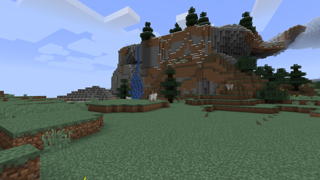

withouthud.png: predicted mountains.


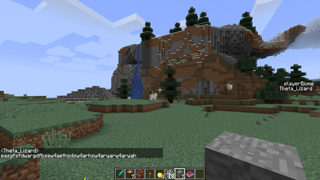

withhud.png: predicted mountains.
frozen river biome:


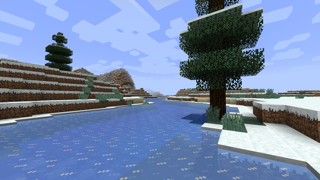

frozen_riverwithouthud.png: predicted snowy_tundra.


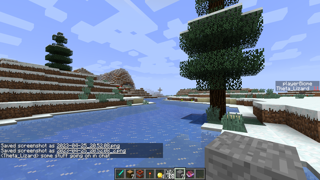

frozen_riverwithhud.png: predicted snowy_tundra.
Predictions with Cross Entropy Loss model:
mountain biome:


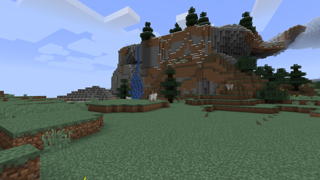

withouthud.png: predicted mountains.


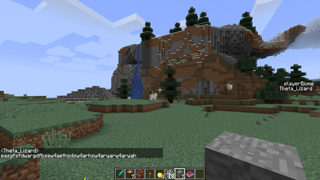

withhud.png: predicted mountains.
frozen river biome:


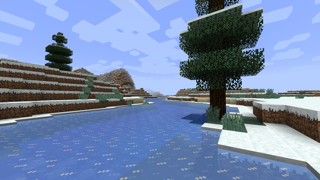

frozen_riverwithouthud.png: predicted snowy_tundra.


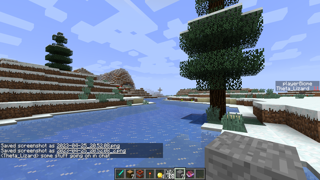

frozen_riverwithhud.png: predicted snowy_tundra.


In [6]:
# now run some example predictions
from pathlib import Path
from PIL import Image

# function which takes an image, transforms, runs prediction, and returns the predicted biome
def predict(model, png_path):
    model.eval()
    image = Image.open(Path(png_path)).convert('RGB')
    display(image.resize((320, 180))) # display the image for human reference
    im = to_tensor(image)
    im = transform_img(im)

    output = model(im[None, ...]) # add empty dimension (expects batches of data)

    prediction = int(torch.max(output.data, 1)[1].numpy())
    predicted_biome = BIOMES[class_to_biome[prediction]]
    
    print(f"{Path(png_path).name}: predicted {predicted_biome}.")

print("Predictions with Focal Loss model:")
print("mountain biome:")
predict(model_fl, '../scraping/example_data/withouthud.png')
predict(model_fl, '../scraping/example_data/withhud.png')
print("frozen river biome:")
predict(model_fl, '../scraping/example_data/frozen_riverwithouthud.png')
predict(model_fl, '../scraping/example_data/frozen_riverwithhud.png')

print("Predictions with Cross Entropy Loss model:")
print("mountain biome:")
predict(model_ce, '../scraping/example_data/withouthud.png')
predict(model_ce, '../scraping/example_data/withhud.png')
print("frozen river biome:")
predict(model_ce, '../scraping/example_data/frozen_riverwithouthud.png')
predict(model_ce, '../scraping/example_data/frozen_riverwithhud.png')



Results for the Focal loss model:
Average class training accuracy: 0.481907
Average class testing accuracy: 0.431228


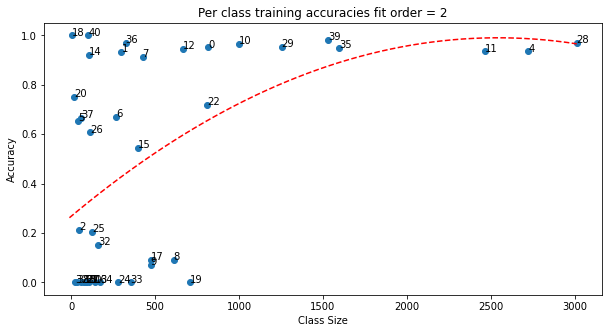

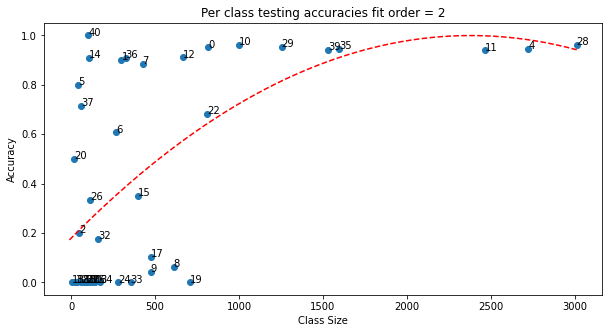

Results for the Cross Entropy loss model:
Average class training accuracy: 0.862305
Average class testing accuracy: 0.429080


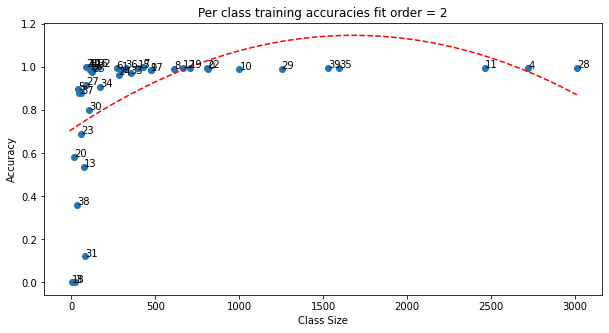

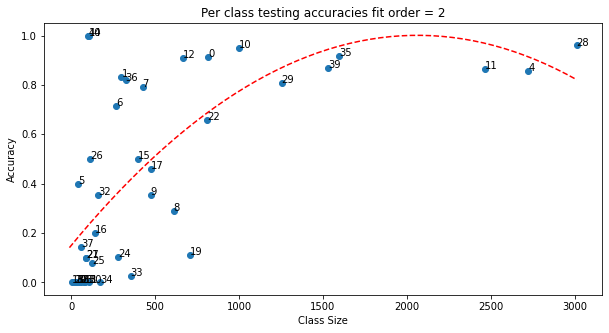

In [19]:
# run some comparisons on the performance of the two models
from modules import train_info as ti # custom module

import importlib
importlib.reload(ti) # ensure code changes are applied (otherwise jupyter does not reimport)

fl_log = "logs/trainlog_2023-04-25_FocalLoss300ep.json"
ce_log = "logs/trainlog_2023-04-26_CrossEntropyLoss300ep.json"

# plot the info on the trained focal loss model
print("Results for the Focal loss model:")
ti.load_info(fl_log)

# plot the info on the trained cross entropy loss model
print("Results for the Cross Entropy loss model:")
ti.load_info(ce_log)

40: frozen_ocean
24: birch_forest_hills
Here's what a frozen_ocean biome looks like
It has some very unique freatures


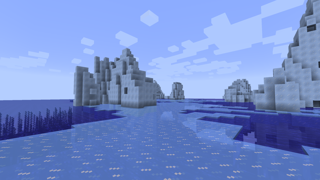

frozen_ocean.png: predicted frozen_ocean.
And here's an example of the birch_forest_hills biome looks like


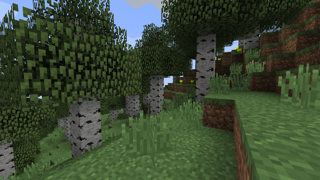

birch_forest_hills.png: predicted birch_forest.
You can see that the model was close, but could not distinguish
hilled areas from non hilled areas affectively


In [22]:
# as can be seen in the plots, both models did very well with class #40 (frozen_ocean)
# but both did very poorly with class #24 (birch_forest_hills), 
# despite #24 having more data points. why is that? lets look at some examples of those classes
print('40:', BIOMES[class_to_biome[40]])
print('24:', BIOMES[class_to_biome[24]])

print("Here's what a frozen_ocean biome looks like")
print("It has some very unique freatures")
predict(model_fl, '../scraping/example_data/frozen_ocean.png')

print("And here's an example of the birch_forest_hills biome looks like")
predict(model_fl, '../scraping/example_data/birch_forest_hills.png')
print("You can see that the model was close, but could not distinguish\nhilled areas from non hilled areas affectively")